# Análise exploratória de dados e Clusterização de jogadores da NBA

In [2]:
# Importar Bibliotecas

import numpy as np # calculo númerico
import pandas as pd # Preparação de dados
import matplotlib.pyplot as plt # pacote de plotagem
import seaborn as sns # pacote de plotagem otimizado
import warnings # Avisos
warnings.filterwarnings("ignore") # Ignorar avisos

In [56]:
# Importar Dataset NBA Players

df = pd.read_csv(r"C:\Users\rayners\Desktop\Datasets\all_seasons - NBA.csv")

In [5]:
# Visualizar as primeiras 5 linhas do df

df.head()

,Unnamed: 0,player_name,team_abbreviation,age,player_height,player_weight,college,country,draft_year,draft_round,...,pts,reb,ast,net_rating,oreb_pct,dreb_pct,usg_pct,ts_pct,ast_pct,season
0,0,Randy Livingston,HOU,22.0,193.04,94.800728,Louisiana State,USA,1996,2,...,3.9,1.5,2.4,0.3,0.042,0.071,0.169,0.487,0.248,1996-97
1,1,Gaylon Nickerson,WAS,28.0,190.50,86.182480,Northwestern Oklahoma,USA,1994,2,...,3.8,1.3,0.3,8.9,0.030,0.111,0.174,0.497,0.043,1996-97
2,2,George Lynch,VAN,26.0,203.20,103.418976,North Carolina,USA,1993,1,...,8.3,6.4,1.9,-8.2,0.106,0.185,0.175,0.512,0.125,1996-97
3,3,George McCloud,LAL,30.0,203.20,102.058200,Florida State,USA,1989,1,...,10.2,2.8,1.7,-2.7,0.027,0.111,0.206,0.527,0.125,1996-97
4,4,George Zidek,DEN,23.0,213.36,119.748288,UCLA,USA,1995,1,...,2.8,1.7,0.3,-14.1,0.102,0.169,0.195,0.500,0.064,1996-97


In [6]:
# Info do df
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12844 entries, 0 to 12843
Data columns (total 22 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         12844 non-null  int64  
 1   player_name        12844 non-null  object 
 2   team_abbreviation  12844 non-null  object 
 3   age                12844 non-null  float64
 4   player_height      12844 non-null  float64
 5   player_weight      12844 non-null  float64
 6   college            12844 non-null  object 
 7   country            12844 non-null  object 
 8   draft_year         12844 non-null  object 
 9   draft_round        12844 non-null  object 
 10  draft_number       12844 non-null  object 
 11  gp                 12844 non-null  int64  
 12  pts                12844 non-null  float64
 13  reb                12844 non-null  float64
 14  ast                12844 non-null  float64
 15  net_rating         12844 non-null  float64
 16  oreb_pct           128

In [7]:
# Quantidade de colunas e Linhas
df.shape

(12844, 22)

In [8]:
# Nenhuma coluna com dados nulos
df.isnull().sum()

Unnamed: 0           0
player_name          0
team_abbreviation    0
age                  0
player_height        0
player_weight        0
college              0
country              0
draft_year           0
draft_round          0
draft_number         0
gp                   0
pts                  0
reb                  0
ast                  0
net_rating           0
oreb_pct             0
dreb_pct             0
usg_pct              0
ts_pct               0
ast_pct              0
season               0
dtype: int64

In [9]:
# Visualizar colunas 
df.columns

Index(['Unnamed: 0', 'player_name', 'team_abbreviation', 'age',
       'player_height', 'player_weight', 'college', 'country', 'draft_year',
       'draft_round', 'draft_number', 'gp', 'pts', 'reb', 'ast', 'net_rating',
       'oreb_pct', 'dreb_pct', 'usg_pct', 'ts_pct', 'ast_pct', 'season'],
      dtype='object')

In [10]:
# Analisar a quantidade de jogadores únicos

df['player_name'].nunique()


2551

In [11]:
# Analisar os 10 jogadores com mais temporadas

df['player_name'].value_counts()[0:10]

Vince Carter       22
Dirk Nowitzki      21
Kevin Garnett      20
Udonis Haslem      20
Kobe Bryant        20
LeBron James       20
Jamal Crawford     20
Tyson Chandler     19
Carmelo Anthony    19
Jason Terry        19
Name: player_name, dtype: int64

In [12]:
# Análise resumo estatístico
df.describe()

,Unnamed: 0,age,player_height,player_weight,gp,pts,reb,ast,net_rating,oreb_pct,dreb_pct,usg_pct,ts_pct,ast_pct
count,12844.000000,12844.000000,12844.000000,12844.000000,12844.000000,12844.000000,12844.000000,12844.000000,12844.000000,12844.000000,12844.000000,12844.000000,12844.000000,12844.000000
mean,6421.500000,27.045313,200.555097,100.263279,51.154158,8.212582,3.558486,1.824681,-2.226339,0.054073,0.140646,0.184641,0.513138,0.131595
std,3707.887763,4.339211,9.111090,12.426628,25.084904,6.016573,2.477885,1.800840,12.665124,0.043335,0.062513,0.053545,0.101724,0.094172
min,0.000000,18.000000,160.020000,60.327736,1.000000,0.000000,0.000000,0.000000,-250.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3210.750000,24.000000,193.040000,90.718400,31.000000,3.600000,1.800000,0.600000,-6.400000,0.021000,0.096000,0.149000,0.482000,0.066000
50%,6421.500000,26.000000,200.660000,99.790240,57.000000,6.700000,3.000000,1.200000,-1.300000,0.040000,0.130500,0.181000,0.525000,0.103000
75%,9632.250000,30.000000,208.280000,108.862080,73.000000,11.500000,4.700000,2.400000,3.200000,0.083000,0.179000,0.217000,0.563000,0.179000
max,12843.000000,44.000000,231.140000,163.293120,85.000000,36.100000,16.300000,11.700000,300.000000,1.000000,1.000000,1.000000,1.500000,1.000000


In [13]:
# top 10 jogadores com maior média de pontuação
df.groupby('player_name')['pts'].mean().sort_values(ascending=False)[0:10]

player_name
Luka Doncic         27.700000
Kevin Durant        27.233333
LeBron James        27.200000
Joel Embiid         26.542857
Allen Iverson       26.064286
Trae Young          25.720000
Damian Lillard      25.500000
Michael Jordan      25.300000
Zion Williamson     25.166667
Donovan Mitchell    24.816667
Name: pts, dtype: float64

In [14]:
# top 10 jogadores com maior média de assistências
df.groupby('player_name')['ast'].mean().sort_values(ascending=False)[0:10]

player_name
Chris Paul           9.450000
Trae Young           9.340000
Jason Kidd           8.682353
John Wall            8.545455
John Stockton        8.528571
Russell Westbrook    8.333333
Steve Nash           8.161111
Deron Williams       8.025000
Luka Doncic          8.020000
Tyrese Haliburton    7.966667
Name: ast, dtype: float64

In [15]:
# top 10 jogadores com maior média de rebotes
df.groupby('player_name')['reb'].mean().sort_values(ascending=False)[0:10]

player_name
Dennis Rodman         14.150000
Jayson Williams       13.033333
Andre Drummond        12.509091
Charles Barkley       12.000000
Dwight Howard         11.527778
Rudy Gobert           11.360000
Joel Embiid           10.928571
Karl-Anthony Towns    10.850000
Tim Duncan            10.768421
Nikola Jokic          10.550000
Name: reb, dtype: float64

In [16]:
# top 10 países com maior quantidade de jogadores

df['country'].value_counts()[0:10]

USA          10721
Canada         205
France         190
Australia      100
Spain           93
Brazil          86
Turkey          76
Slovenia        76
Croatia         72
Serbia          70
Name: country, dtype: int64

In [17]:
# Criando uma nova feature > BMI(Indice de massa corpórea)

df['BMI'] = df['player_weight'].values / (df['player_height'].values ** 2) * 10000
df.head()

,Unnamed: 0,player_name,team_abbreviation,age,player_height,player_weight,college,country,draft_year,draft_round,...,reb,ast,net_rating,oreb_pct,dreb_pct,usg_pct,ts_pct,ast_pct,season,BMI
0,0,Randy Livingston,HOU,22.0,193.04,94.800728,Louisiana State,USA,1996,2,...,1.5,2.4,0.3,0.042,0.071,0.169,0.487,0.248,1996-97,25.439997
1,1,Gaylon Nickerson,WAS,28.0,190.50,86.182480,Northwestern Oklahoma,USA,1994,2,...,1.3,0.3,8.9,0.030,0.111,0.174,0.497,0.043,1996-97,23.748109
2,2,George Lynch,VAN,26.0,203.20,103.418976,North Carolina,USA,1993,1,...,6.4,1.9,-8.2,0.106,0.185,0.175,0.512,0.125,1996-97,25.046833
3,3,George McCloud,LAL,30.0,203.20,102.058200,Florida State,USA,1989,1,...,2.8,1.7,-2.7,0.027,0.111,0.206,0.527,0.125,1996-97,24.717270
4,4,George Zidek,DEN,23.0,213.36,119.748288,UCLA,USA,1995,1,...,1.7,0.3,-14.1,0.102,0.169,0.195,0.500,0.064,1996-97,26.305303


In [18]:
# Preparando os dados para as análises Univaridas e multivariadas

df2 = df.drop(['Unnamed: 0'], axis=1) #Drop coluna Unnamed: 0
df2 = df2.select_dtypes(include=['int64','float64']) # Selecionando apenas as colunas númericas
df2.head()

,age,player_height,player_weight,gp,pts,reb,ast,net_rating,oreb_pct,dreb_pct,usg_pct,ts_pct,ast_pct,BMI
0,22.0,193.04,94.800728,64,3.9,1.5,2.4,0.3,0.042,0.071,0.169,0.487,0.248,25.439997
1,28.0,190.50,86.182480,4,3.8,1.3,0.3,8.9,0.030,0.111,0.174,0.497,0.043,23.748109
2,26.0,203.20,103.418976,41,8.3,6.4,1.9,-8.2,0.106,0.185,0.175,0.512,0.125,25.046833
3,30.0,203.20,102.058200,64,10.2,2.8,1.7,-2.7,0.027,0.111,0.206,0.527,0.125,24.717270
4,23.0,213.36,119.748288,52,2.8,1.7,0.3,-14.1,0.102,0.169,0.195,0.500,0.064,26.305303


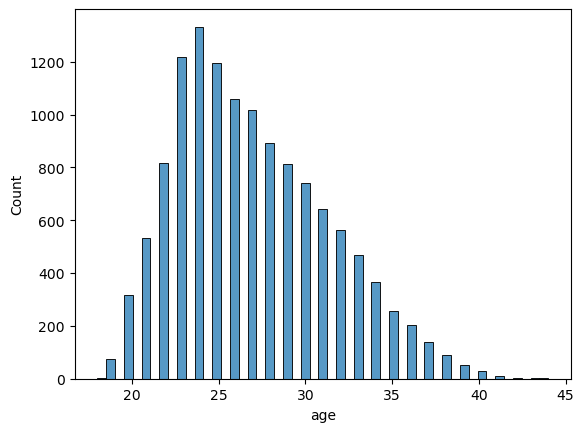

<Figure size 400x400 with 0 Axes>

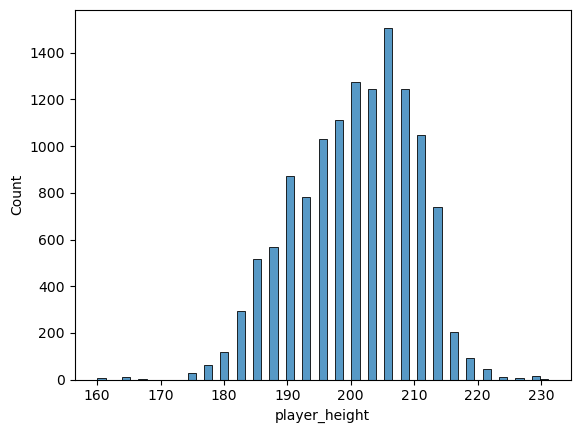

<Figure size 400x400 with 0 Axes>

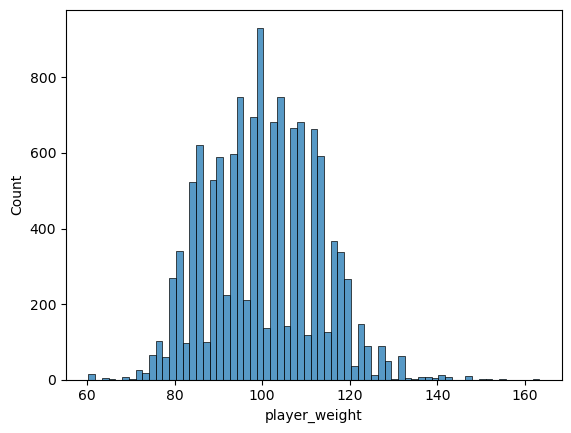

<Figure size 400x400 with 0 Axes>

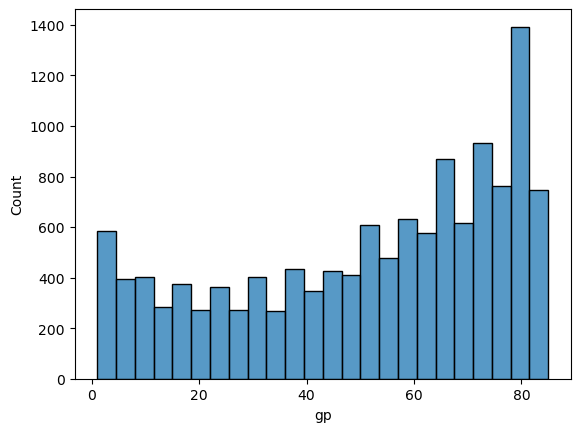

<Figure size 400x400 with 0 Axes>

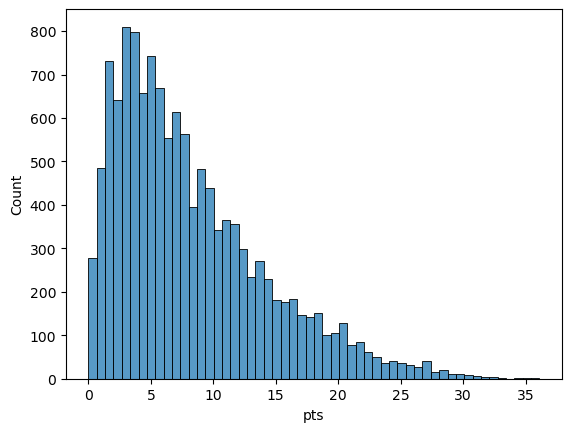

<Figure size 400x400 with 0 Axes>

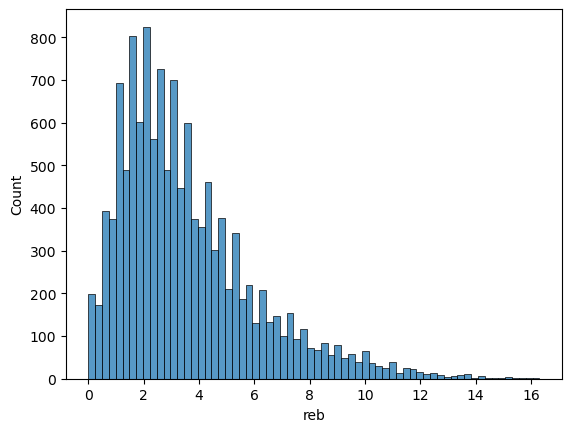

<Figure size 400x400 with 0 Axes>

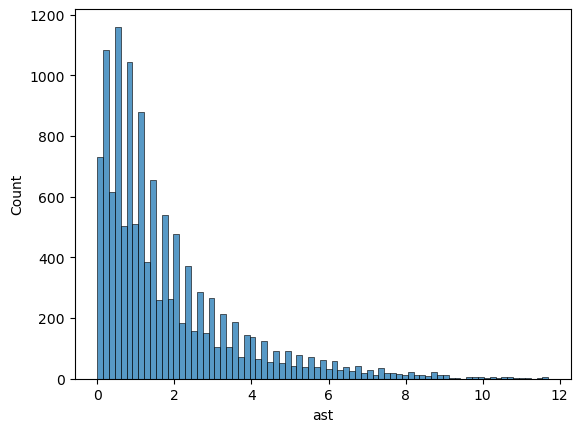

<Figure size 400x400 with 0 Axes>

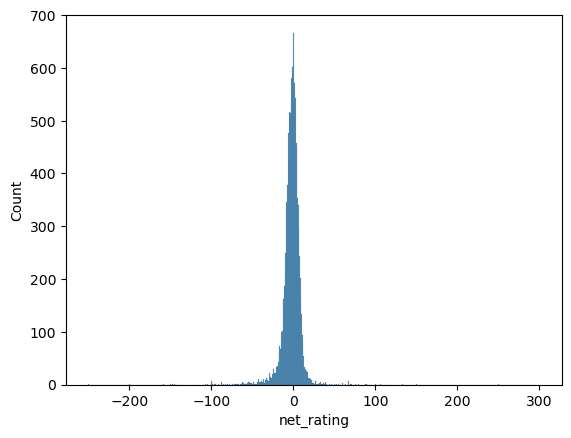

<Figure size 400x400 with 0 Axes>

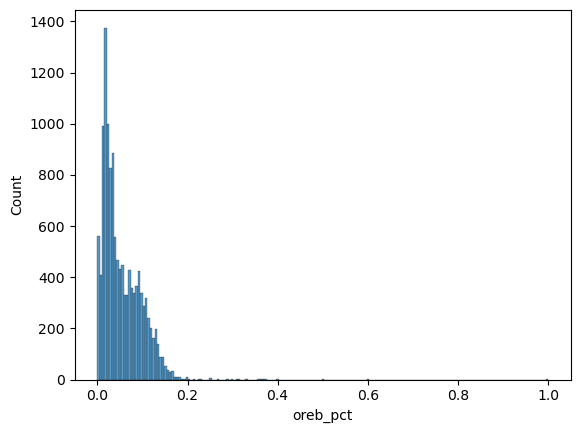

<Figure size 400x400 with 0 Axes>

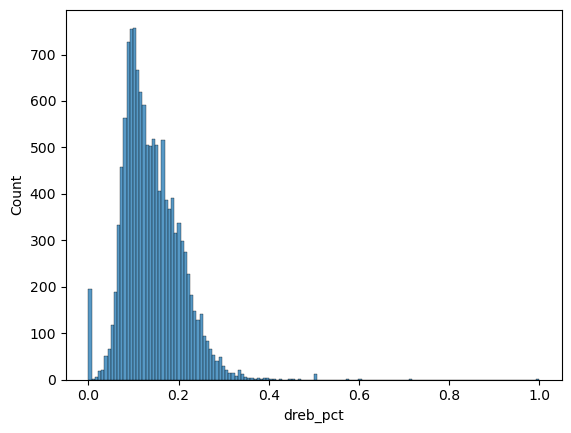

<Figure size 400x400 with 0 Axes>

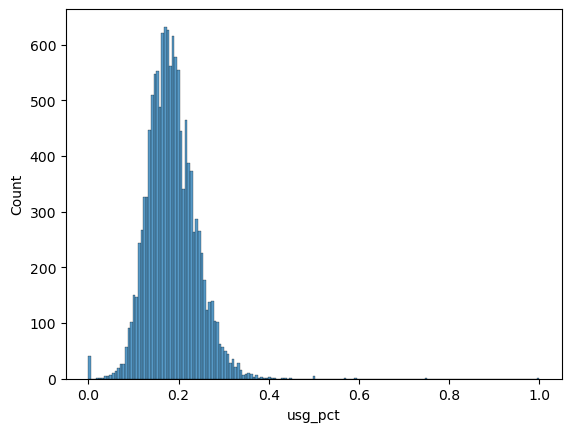

<Figure size 400x400 with 0 Axes>

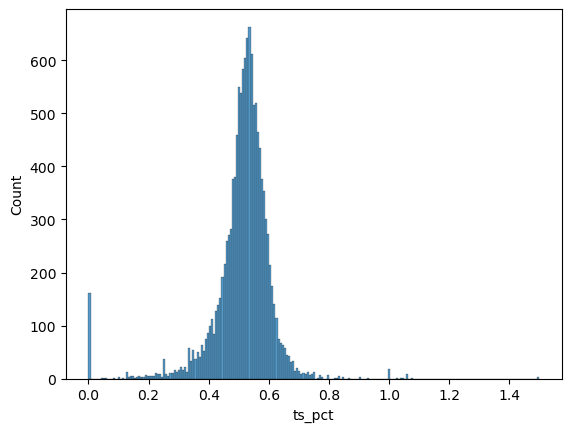

<Figure size 400x400 with 0 Axes>

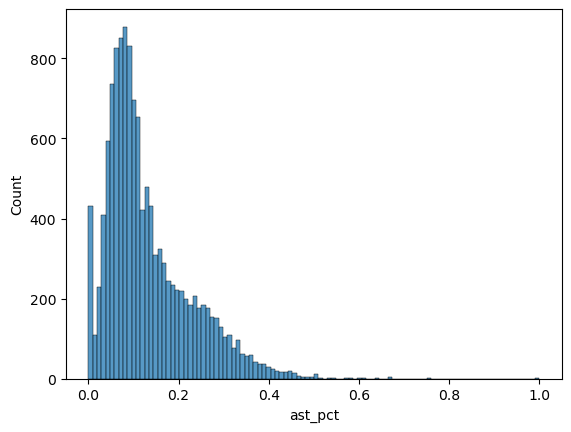

<Figure size 400x400 with 0 Axes>

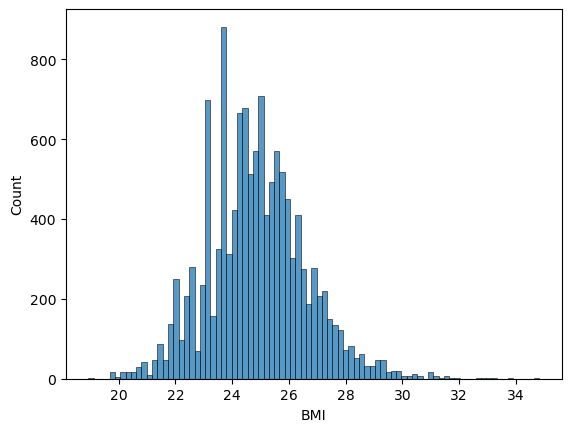

<Figure size 400x400 with 0 Axes>

In [19]:
# Análise univariada histograma para colunas selecionadas

for column in df2.columns:
    sns.histplot(df2[column])
    plt.figure(figsize=(4,4))
    plt.show()

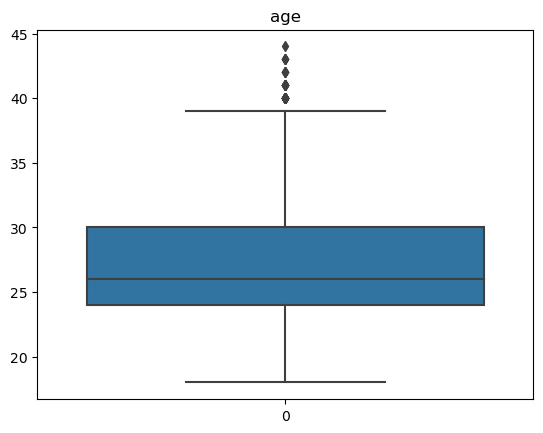

<Figure size 400x400 with 0 Axes>

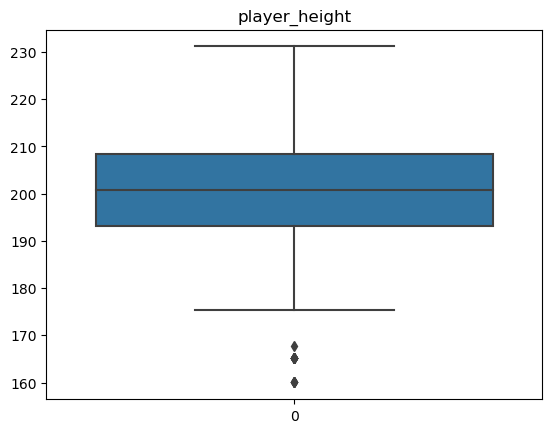

<Figure size 400x400 with 0 Axes>

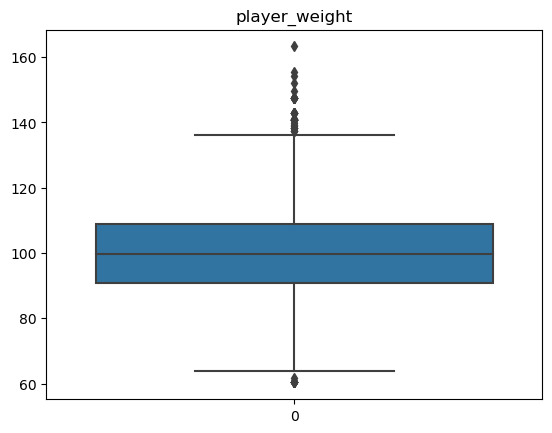

<Figure size 400x400 with 0 Axes>

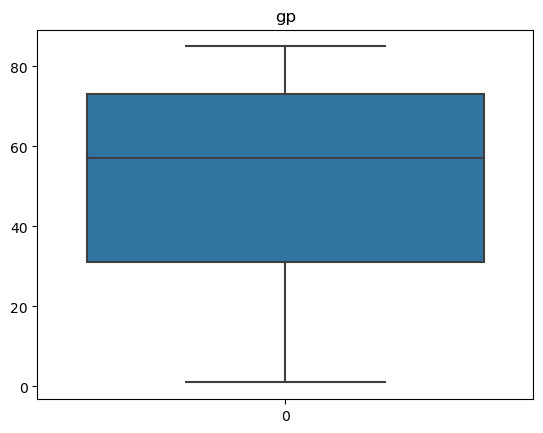

<Figure size 400x400 with 0 Axes>

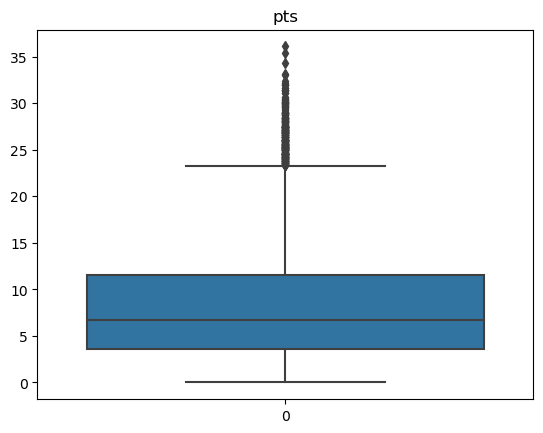

<Figure size 400x400 with 0 Axes>

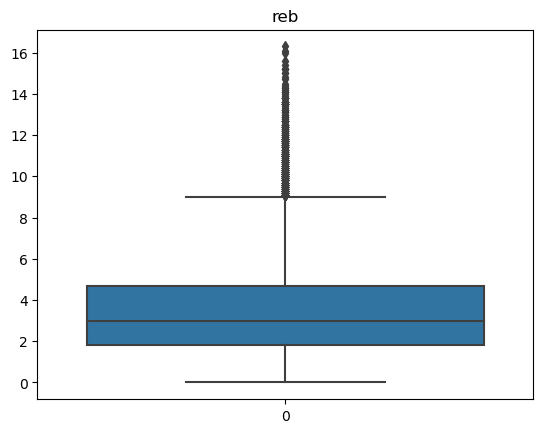

<Figure size 400x400 with 0 Axes>

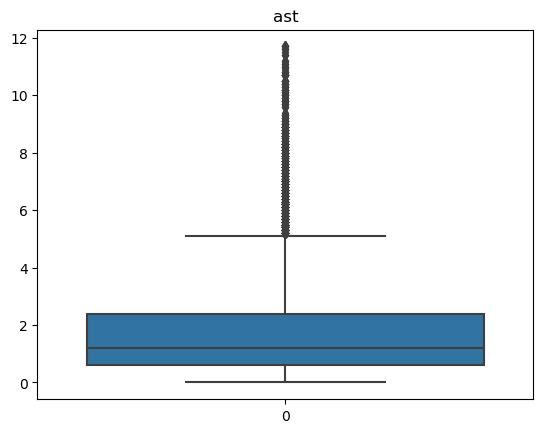

<Figure size 400x400 with 0 Axes>

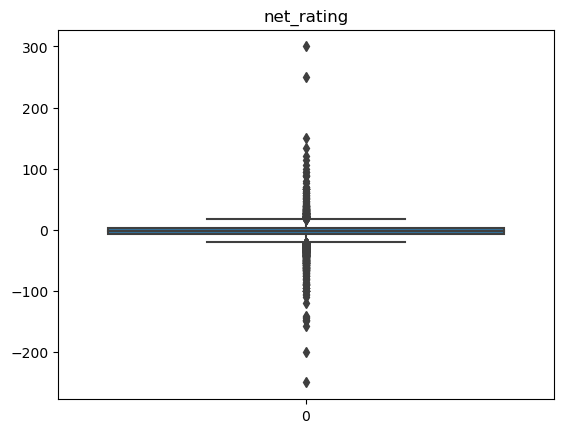

<Figure size 400x400 with 0 Axes>

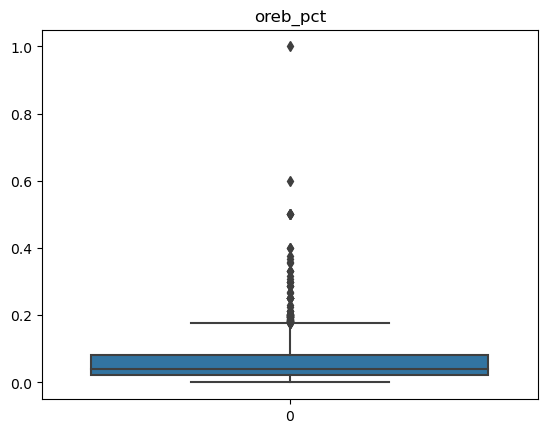

<Figure size 400x400 with 0 Axes>

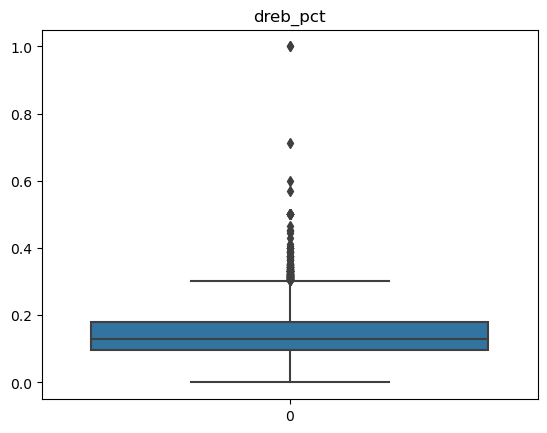

<Figure size 400x400 with 0 Axes>

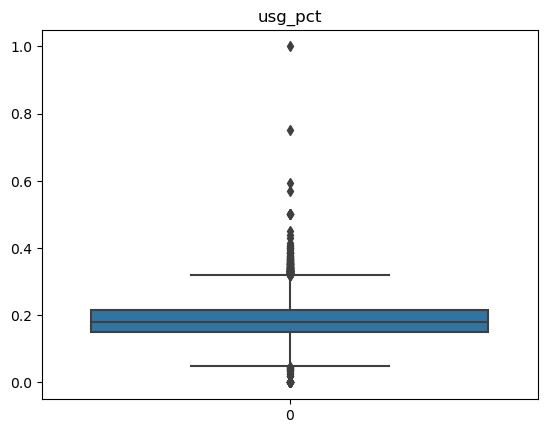

<Figure size 400x400 with 0 Axes>

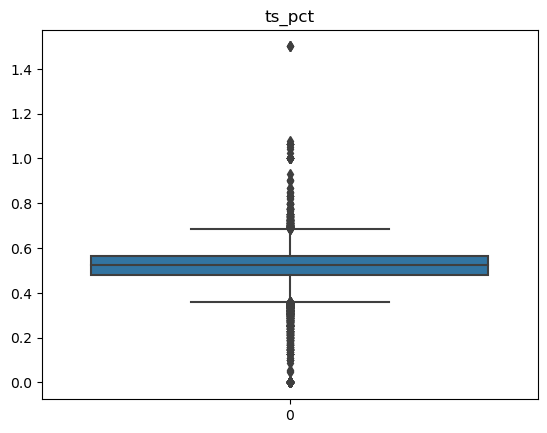

<Figure size 400x400 with 0 Axes>

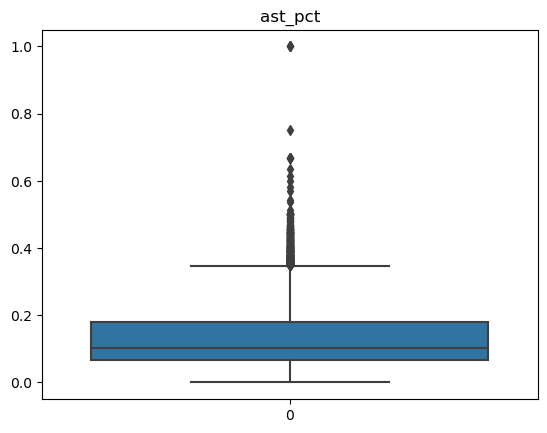

<Figure size 400x400 with 0 Axes>

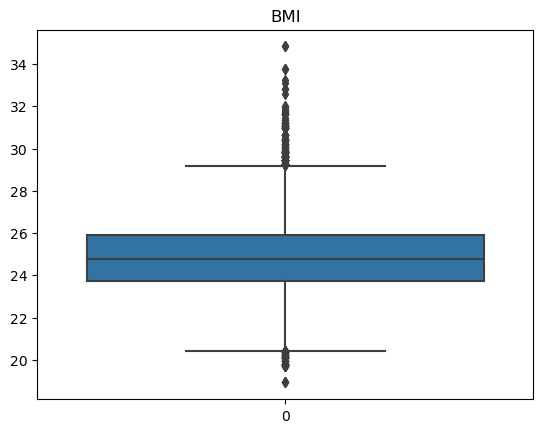

<Figure size 400x400 with 0 Axes>

In [20]:
# Análise univariada boxplot para colunas selecionadas

for column in df2.columns:
    sns.boxplot(df2[column])
    plt.title(column)
    plt.figure(figsize=(4,4))
    plt.show()

In [21]:
# Para uma visualização mais clara irei excluir as colunas Net_Rating, oreb_pct,dreb_pct,usg_pct, ts_pct e ast_pct

df3 = df2.drop(['net_rating','oreb_pct','dreb_pct','usg_pct','ts_pct','ast_pct'], axis=1)
df3

,age,player_height,player_weight,gp,pts,reb,ast,BMI
0,22.0,193.04,94.800728,64,3.9,1.5,2.4,25.439997
1,28.0,190.50,86.182480,4,3.8,1.3,0.3,23.748109
2,26.0,203.20,103.418976,41,8.3,6.4,1.9,25.046833
3,30.0,203.20,102.058200,64,10.2,2.8,1.7,24.717270
4,23.0,213.36,119.748288,52,2.8,1.7,0.3,26.305303
...,...,...,...,...,...,...,...,...
12839,29.0,213.36,127.005760,66,33.1,10.2,4.2,27.899564
12840,20.0,213.36,86.182480,19,2.4,0.9,0.6,18.931847
12841,25.0,205.74,102.511792,71,13.1,6.5,1.2,24.217893
12842,24.0,208.28,113.398000,52,3.4,4.7,0.5,26.140281


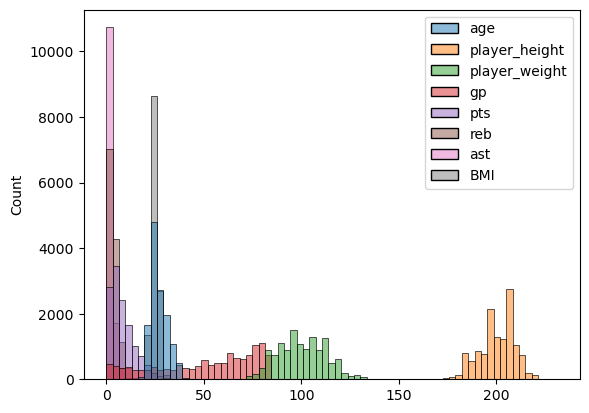

<Figure size 500x500 with 0 Axes>

In [22]:
# Análise univariada histograma para colunas selecionadas

sns.histplot(df3)
plt.figure(figsize=(5,5))
plt.show()

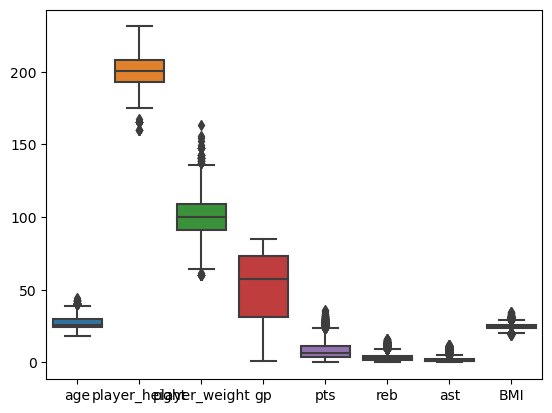

<Figure size 500x500 with 0 Axes>

In [23]:
# Análise univariada boxplot para colunas selecionadas

sns.boxplot(df3)
plt.figure(figsize=(5,5))
plt.show()

<Axes: >

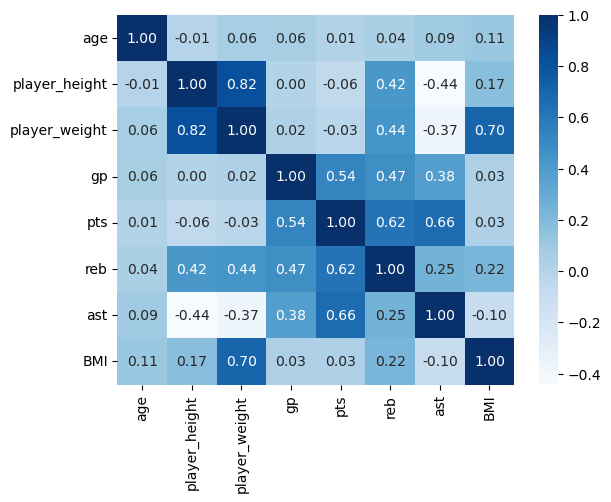

In [24]:
# Análise multivariada: Correlação entre as variáveis das colunas do df3

corr = df3.corr()

# Plotagem da correlação no gráfico de Heatmap 
sns.heatmap(corr,cmap='Blues',annot=True,fmt='.2f')

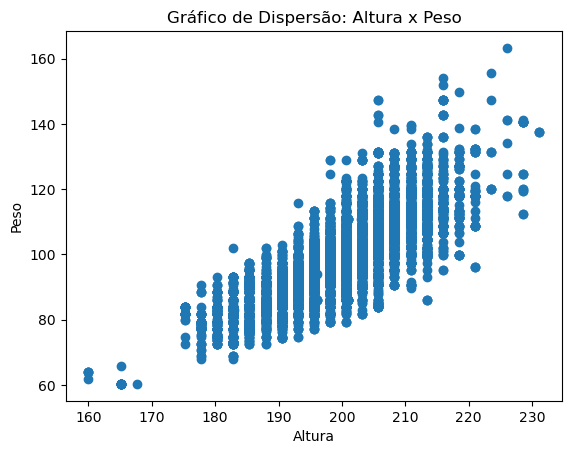

In [25]:
# Análise bivariada Player Height x Player_ Weight (Altura x Peso dos jogadores)

plt.scatter(x=df3['player_height'],y=df3['player_weight'])
plt.xlabel('Altura')
plt.ylabel('Peso')
plt.title('Gráfico de Dispersão: Altura x Peso')
plt.show()

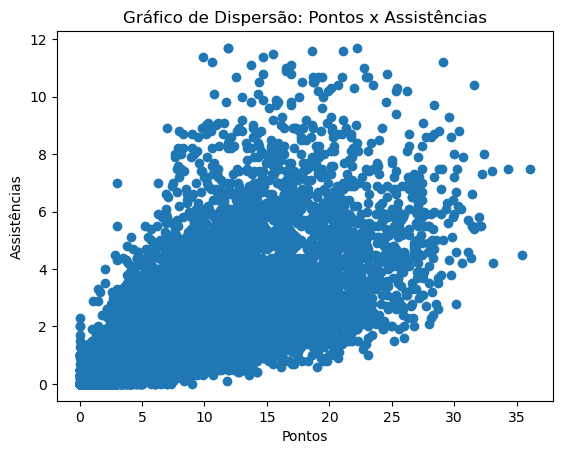

In [26]:
# Análise bivariada Pts x Ast (Pontos x Assistências)

plt.scatter(x=df3['pts'],y=df3['ast'])
plt.xlabel('Pontos')
plt.ylabel('Assistências')
plt.title('Gráfico de Dispersão: Pontos x Assistências')
plt.show()

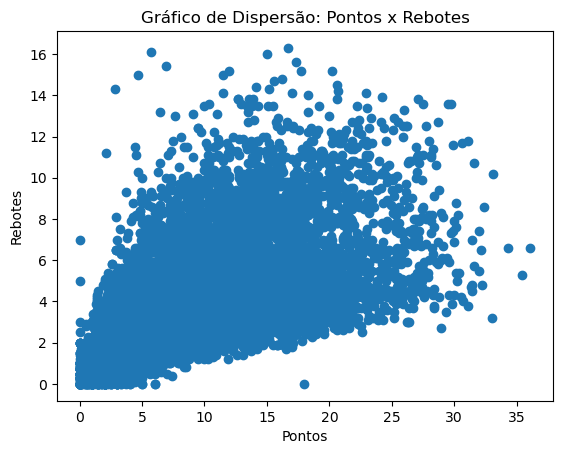

In [27]:
# Análise bivariada Pts x Reb (Pontos x Rebotes)

plt.scatter(x=df3['pts'],y=df3['reb'])
plt.xlabel('Pontos')
plt.ylabel('Rebotes')
plt.title('Gráfico de Dispersão: Pontos x Rebotes')
plt.show()

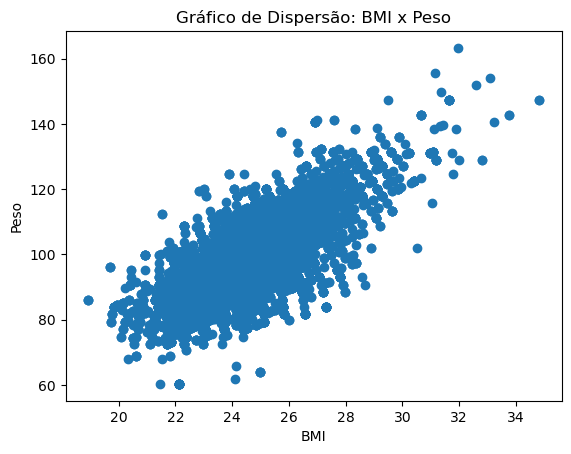

In [28]:
# Análise bivariada BMI x Reb (BMI x Rebotes)
plt.scatter(x=df3['BMI'],y=df3['player_weight'])
plt.xlabel('BMI')
plt.ylabel('Peso')
plt.title('Gráfico de Dispersão: BMI x Peso')
plt.show()

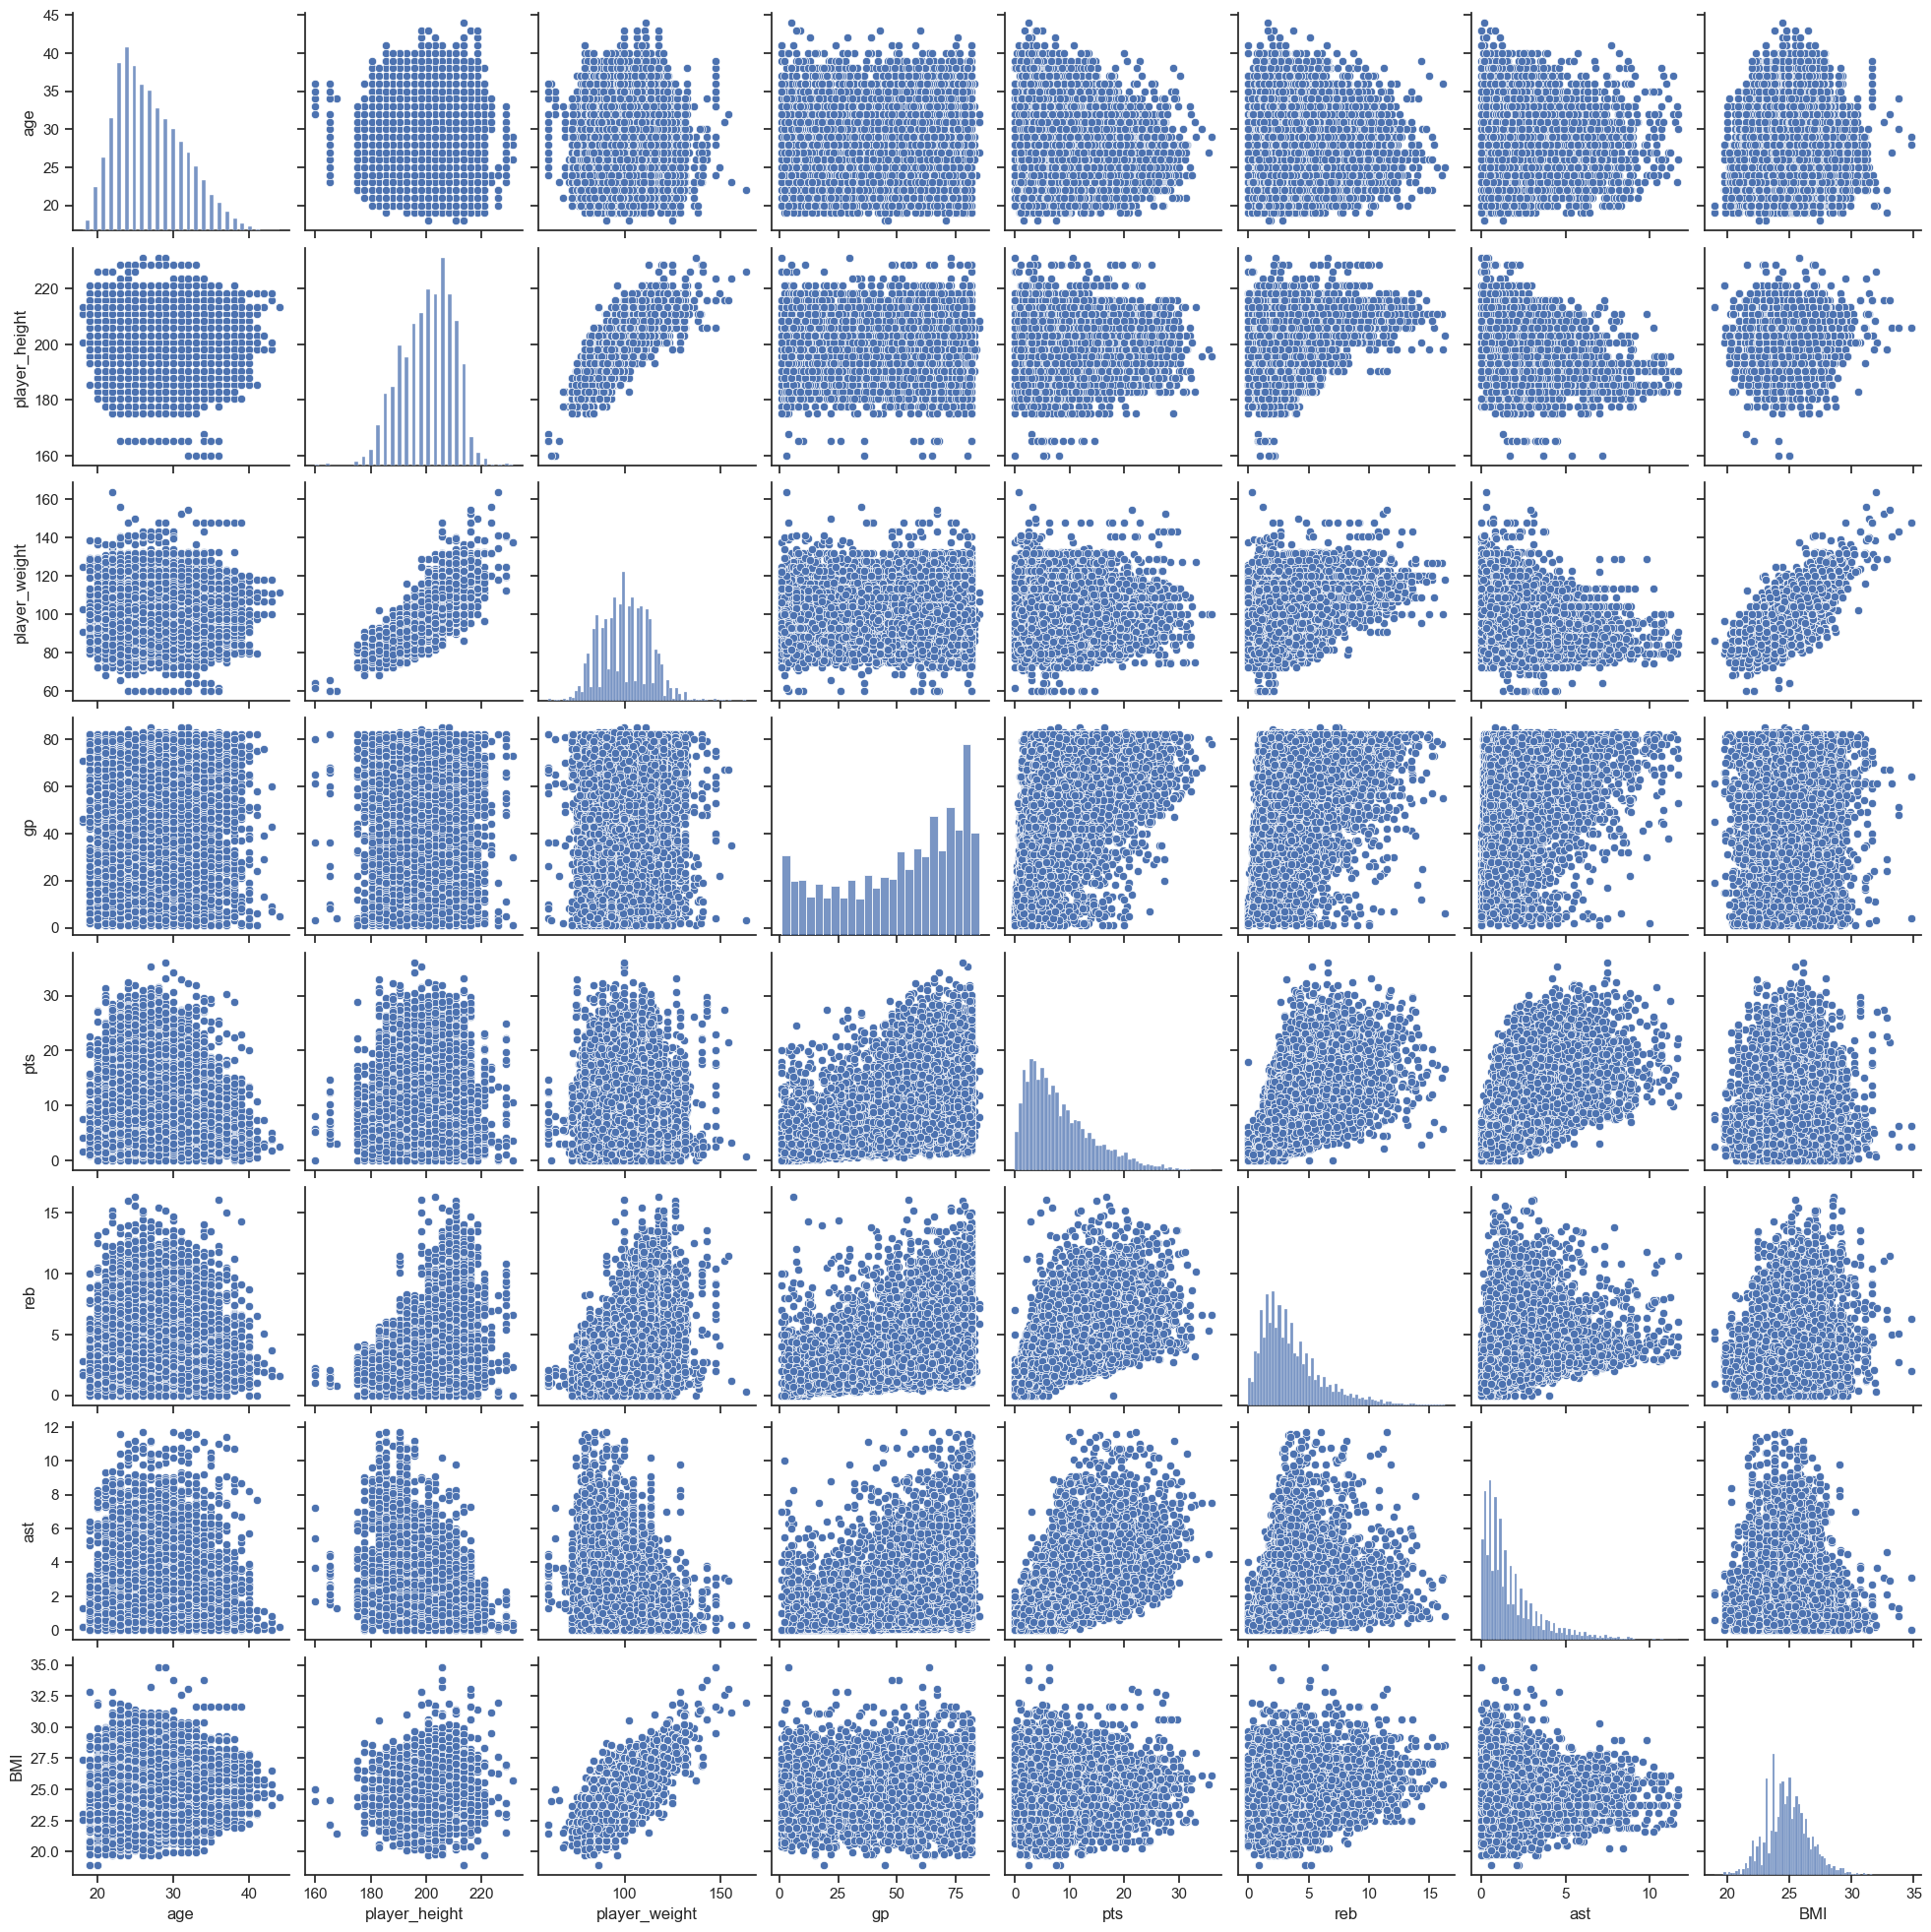

In [29]:
# Análise Multivariada usando Pairplot

sns.set(style="ticks")
sns.pairplot(df3)
plt.show()

In [30]:
# Padronização dos dados utilizando StandScaler

from sklearn.preprocessing import StandardScaler
x = df3
scaler = StandardScaler()
x1 = scaler.fit_transform(x)

In [31]:
# Array dos dados padronizados 
x1

array([[-1.16277124, -0.82486167, -0.43960146, ..., -0.83077584,
         0.31948518,  0.33771175],
       [ 0.22002255, -1.10365365, -1.13315916, ..., -0.911493  ,
        -0.84668284, -0.62806383],
       [-0.24090872,  0.29030625,  0.25395623, ...,  1.14679444,
         0.04182612,  0.11328334],
       ...,
       [-0.47137435,  0.56909823,  0.18095016, ...,  1.18715302,
        -0.34689655, -0.35989827],
       [-0.70183998,  0.84789021,  1.05702304, ...,  0.46069863,
        -0.73561922,  0.73745301],
       [ 1.3723507 ,  0.56909823,  0.2174532 , ...,  0.01675428,
        -0.51349198, -0.29872912]])

In [32]:
# Dimensionar os dados usando o PCA (Análise dos componentes principais)

from sklearn.decomposition import PCA

# Número de componentes = 2

principal =PCA(n_components=2)
principal.fit(x1)
principalComponentes1 = principal.transform(x1)

# Checar a dimensão dos dados

print(principalComponentes1.shape)

(12844, 2)


In [33]:
# Arrays dos componentes principais
principal.components_

array([[ 0.06407569,  0.46845218,  0.55876643,  0.21579314,  0.21237237,
         0.4718029 , -0.06604339,  0.38157376],
       [ 0.04355963, -0.25674222, -0.25370577,  0.42372504,  0.5359658 ,
         0.28840701,  0.55089941, -0.11978465]])

In [34]:
# Criando as colunas dos componentes
PCA_dataset1 = pd.DataFrame(data = principalComponentes1, columns = ['componente1', 'componente2'])
PCA_dataset1.head()

,componente1,componente2
0,-1.032469,0.001416
1,-2.311283,-1.263295
2,0.759716,0.027019
3,0.272594,0.195062
4,1.310433,-2.049553


In [35]:
# Separando as colunas em duas variaveis
principal_componente1 = PCA_dataset1['componente1']
principal_componente2 = PCA_dataset1['componente2']

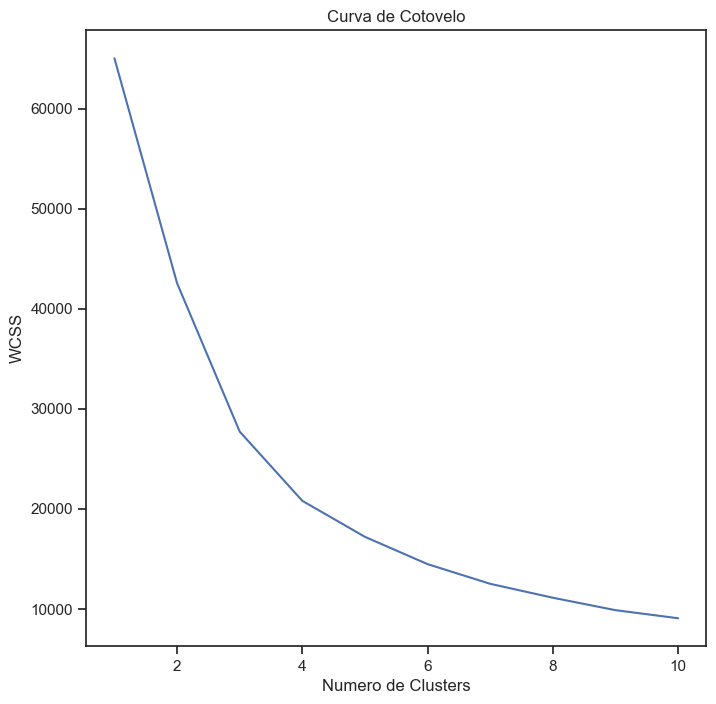

In [36]:
# Elbow Method (Metódo do cotovelo)
# Cria a Curva de Cotovelo para encontrar o Numero Ideal de Clusters

from sklearn.cluster import KMeans
wcss = []

for i in range(1,11):
    kmeans = KMeans(n_clusters = i, max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(principalComponentes1)
    wcss.append(kmeans.inertia_)
    
# Mostra o Gráfico
plt.figure(figsize = (8,8))
plt.plot(range(1, 11), wcss)
plt.title('Curva de Cotovelo')
plt.xlabel('Numero de Clusters')
plt.ylabel('WCSS') #within cluster sum of squares
plt.show()

In [37]:
# Criando o modelo de clusterização usando o Kmeans

kmeansmodelo = KMeans(n_clusters= 3, init='k-means++', random_state=0)
y_kmeans = kmeansmodelo.fit_predict(principalComponentes1)

In [38]:
# Labels determinados pelo kmeans
kmeansmodelo.labels_

array([2, 2, 1, ..., 1, 1, 2])

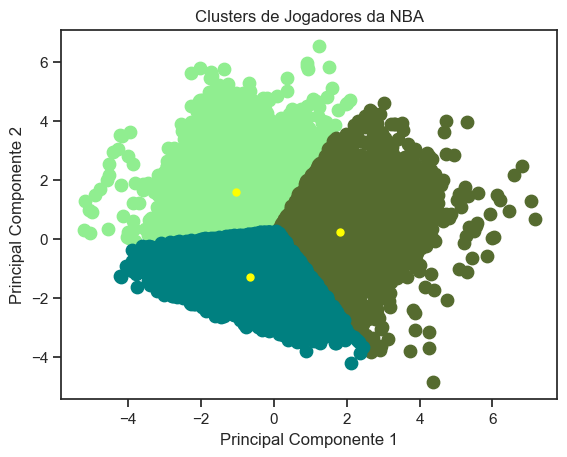

In [39]:
# Visualizando os clusters criados pelo modelo

plt.scatter(principalComponentes1[y_kmeans == 0, 0], principalComponentes1[y_kmeans == 0, 1], s = 80, c = 'lightgreen', label = 'Cluster 1')
plt.scatter(principalComponentes1[y_kmeans == 1, 0], principalComponentes1[y_kmeans == 1, 1], s = 80, c = 'darkolivegreen', label = 'Cluster 2')
plt.scatter(principalComponentes1[y_kmeans == 2, 0], principalComponentes1[y_kmeans == 2, 1], s = 80, c = 'teal', label = 'Cluster 3')
plt.scatter(kmeansmodelo.cluster_centers_[:, 0], kmeansmodelo.cluster_centers_[:, 1], s = 25, c = 'yellow', label = 'Centroids')  
plt.title('Clusters de Jogadores da NBA')
plt.xlabel('Principal Componente 1')
plt.ylabel('Principal Componente 2')
plt.show()

In [40]:
from sklearn.metrics import silhouette_score

silhouette_avg = silhouette_score(principalComponentes1, y_kmeans)
print(f"Coeficiente de Silhueta Médio: {silhouette_avg}")

Coeficiente de Silhueta Médio: 0.3575376253124389


In [41]:
# Adicionando o cluster criado ao df original

df['Cluster'] = kmeansmodelo.labels_
df.head()

,Unnamed: 0,player_name,team_abbreviation,age,player_height,player_weight,college,country,draft_year,draft_round,...,ast,net_rating,oreb_pct,dreb_pct,usg_pct,ts_pct,ast_pct,season,BMI,Cluster
0,0,Randy Livingston,HOU,22.0,193.04,94.800728,Louisiana State,USA,1996,2,...,2.4,0.3,0.042,0.071,0.169,0.487,0.248,1996-97,25.439997,2
1,1,Gaylon Nickerson,WAS,28.0,190.50,86.182480,Northwestern Oklahoma,USA,1994,2,...,0.3,8.9,0.030,0.111,0.174,0.497,0.043,1996-97,23.748109,2
2,2,George Lynch,VAN,26.0,203.20,103.418976,North Carolina,USA,1993,1,...,1.9,-8.2,0.106,0.185,0.175,0.512,0.125,1996-97,25.046833,1
3,3,George McCloud,LAL,30.0,203.20,102.058200,Florida State,USA,1989,1,...,1.7,-2.7,0.027,0.111,0.206,0.527,0.125,1996-97,24.717270,1
4,4,George Zidek,DEN,23.0,213.36,119.748288,UCLA,USA,1995,1,...,0.3,-14.1,0.102,0.169,0.195,0.500,0.064,1996-97,26.305303,2


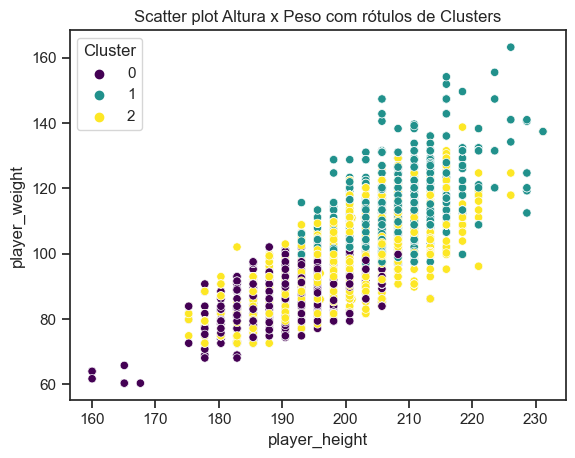

In [42]:
# Visualização de dados usando Scatter de Altura x Peso rotulado com o Cluster

sns.scatterplot(x='player_height',y='player_weight', hue='Cluster', data = df, palette='viridis')
plt.title('Scatter plot Altura x Peso com rótulos de Clusters')
plt.show()

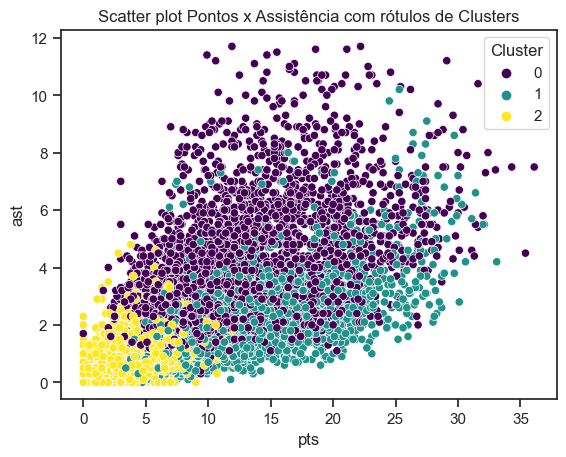

In [43]:
# Visualização de dados usando Scatter de Altura x Peso rotulado com o Cluster

sns.scatterplot(x='pts',y='ast', hue='Cluster', data = df, palette='viridis')
plt.title('Scatter plot Pontos x Assistência com rótulos de Clusters')
plt.show()

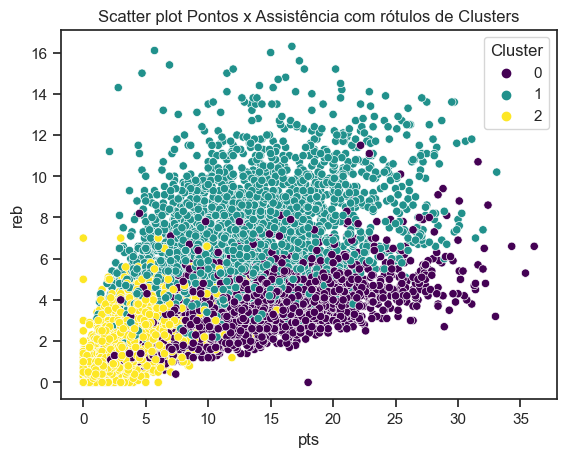

In [44]:
# Visualização de dados usando Scatter de Altura x Peso rotulado com o Cluster

sns.scatterplot(x='pts',y='reb', hue='Cluster', data = df, palette='viridis')
plt.title('Scatter plot Pontos x Assistência com rótulos de Clusters')
plt.show()